# Visualize predictions

In this example we visualize predictions made by the model.
The images and prediction labels files use the same format as the MNIST files.

We randomly choose images and their predicted labels from the dataset and visualize them.
The user should estimate the accuracy by inspecting the images and comparing to the predicted labels.

First, set the following variables to the locations of your datasets and tutorials. Make sure you use the actual directories where you placed your datasets and tutorials.

In [15]:
DATASETS_PATH = "$HOME/datasets"
TUTORIALS_PATH = "$HOME/Projects/tutorials"

Then create two functions to read the MNIST-formatted files into images and labels lists.

In [10]:
import struct
import os
from array import array


def read_labels(filename):
    filename = os.path.expandvars(filename)
    with open(filename, "rb") as f:
        magic, size = struct.unpack(">II", f.read(8))
        if magic != 2049:
            raise ValueError(f"Magic number is wrong: expected 2049, got {magic}")
        labels = array("B", f.read())
    
    return labels

def read_images(filename):
    filename = os.path.expandvars(filename)
    images = []
    
    with open(filename, "rb") as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            raise ValueError(f"Magic number is wrong: expected 2051, got {magic}")
        image_data = array("B", f.read())
        
    for i in range(size):
        images.append([0] * rows * cols)
        
    for i in range(size):
        img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
        img = img.reshape(28, 28)
        images[i][:] = img
        
    return images

We create this `data_transform` function to convert the images to tensors and normalize them. 

In [11]:
from torchvision import transforms

data_transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])


We create a custom dataset using PyTorch's Dataset.
You can read more about that here: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files

In [12]:
import numpy as np
from torch.utils.data import Dataset

class CustomMNIST(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __getitem__(self, idx):
        label = self.labels[idx]
        image = self.images[idx]
        image = self.transform(np.array(image))
        return image, label
    
    def __len__(self):
        return len(self.labels)

Now we read the images from our inference dataset and predicted labels from the file generated by the model.

In [16]:
predict_images = read_images(os.path.join(DATASETS_PATH, "fashion-mnist/t10k-images-idx3-ubyte"))
predict_labels = read_labels(os.path.join(TUTORIALS_PATH, "lenet/results/prediction-labels-idx1-ubyte"))

We create a custom PyTorch dataset using the inference images, predicted labels, and the `data_transform` function we created earlier. 

In [17]:
predict_dataset = CustomMNIST(predict_images, predict_labels,transform=data_transform)
len(predict_dataset)

9984

The function below displays the MNIST images and their labels. 

In [18]:
import matplotlib.pyplot as plt
def plot_examples(images, labels, columns=5):   #by default set rows=1

    rows = len(images) // (columns)
    fig = plt.figure(figsize=(6.4, 2*rows))
    for i, (img, lbl) in enumerate(zip(images, labels)):
        if i < columns*rows:
            ax = fig.add_subplot(rows, columns, i+1)
            ax.imshow(img.reshape(28, 28),cmap="gray")
            ax.set_xticks([]) #set empty label for x axis
            ax.set_yticks([]) #set empty label for y axis
            ax.set_title(lbl)
    plt.tight_layout()
    return fig

We pick several (`sample_size`) images and their predicted labels randomly and display them. We use the Fashion MNIST dataset labels here.

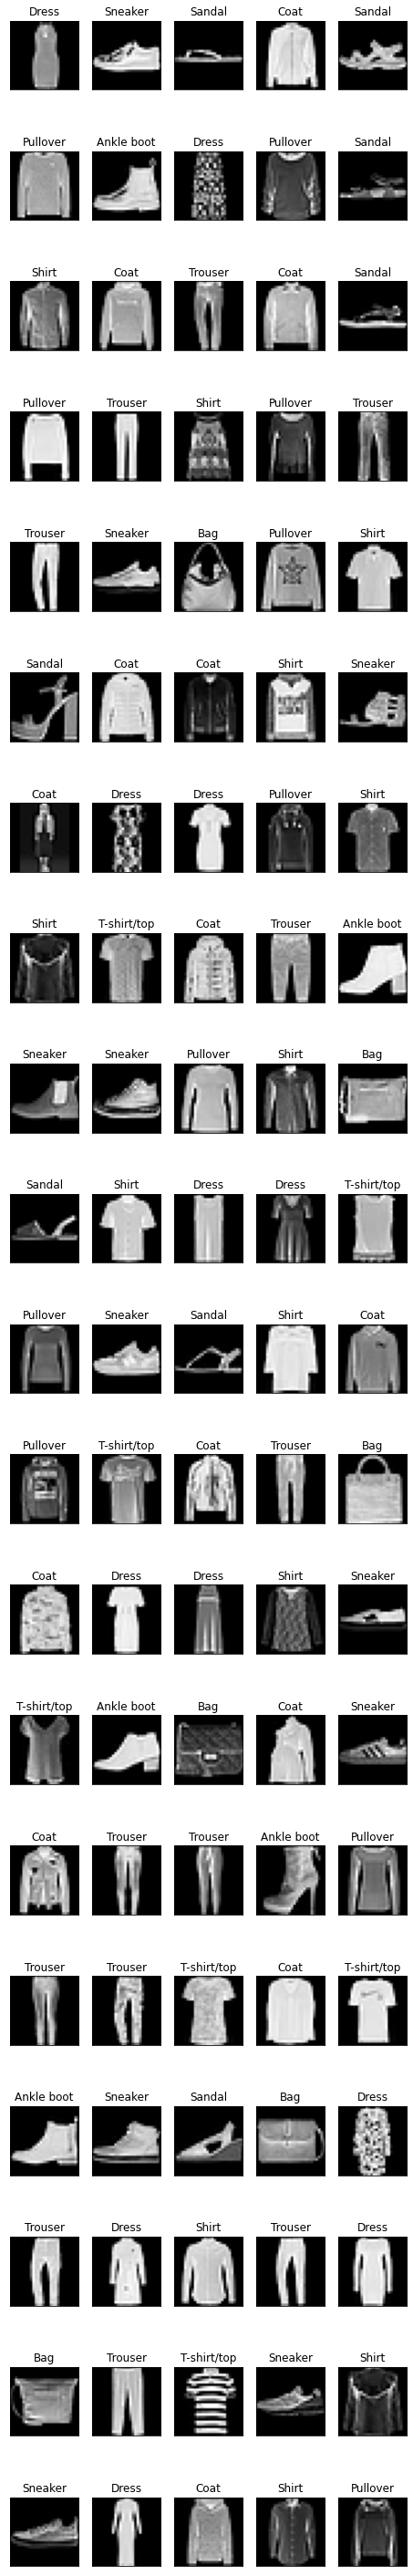

In [19]:
import random

images = [] 
labels = []
sample_size = 100

fashion_items = [
'T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot',
]

for i in range (0, sample_size):
    r = random.randint(0, len(predict_dataset))
    images.append(predict_dataset[r][0])
    labels.append(fashion_items[predict_dataset[r][1]])    

plot_examples(images, labels, columns=5);   # keep the semicolon here or it will output the images twice

Now look at the images and their labels and estimate the inference accuracy.